In [1]:
import pandas as pd
import sklearn
import pydotplus
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np

In [2]:
data = pd.read_csv("D:/NTU/econometrics/hw1/Table 11_7.csv")
data.head()

,HP,MPG,MPGF,VOL,WT,SP
0,49,65.4,53.700681,89,17.5,96
1,55,56.0,50.013401,92,20.0,97
2,55,55.9,50.013401,92,20.0,97
3,70,49.0,45.696322,92,20.0,105
4,53,46.5,50.504232,92,20.0,96


### 有加MPGF 

In [28]:
ln = LinearRegression()
features = ["HP","MPGF", "WT", "SP"]
X = data[features]
y = data["MPG"]
ln.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [4]:
data["HP"].size

81

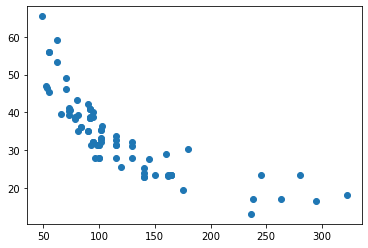

In [29]:
 #fig, ax = plt.subplots()
print(plt.scatter(data["HP"], y))

plt.show()
 #fig.suptitle('A Simple Scatter Plot')
 #plt.show()

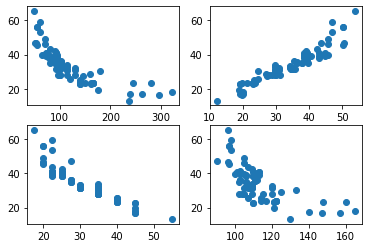

In [6]:
for i in range(1,len(features)+1):
    plt.subplot(2,2,i)
    plt.scatter(data[features[i-1]],y)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
X_train.head()

,HP,MPGF,WT,SP
47,98,35.052330,30.0,107
79,295,19.833733,45.0,157
30,84,39.431235,27.5,103
10,73,44.652834,22.5,103
55,130,27.856252,35.0,115


In [31]:
ln.fit(X_train, y_train)
print(ln.intercept_)
print(ln.coef_)

# print the R-squared value for the model
ln.score(X_train, y_train)

50014432561.84148
[ 1.02797093e+08 -2.63289732e+08 -5.01112289e+08 -3.34824865e+08]


0.9063457529257678

In [32]:
y_pred = ln.predict(X_test)
y_pred_df = pd.DataFrame(y_pred, columns = ["y_predict"], index =  X_test.index.copy())
y_pred_df.head()

,y_predict
0,49.345543
73,19.159050
75,19.322014
6,47.194855
71,24.864548


In [33]:
X_test_df = pd.DataFrame(X_test)
y_test_df = pd.DataFrame(y_test)
df_test_pred = pd.concat([X_test_df, y_test_df, y_pred_df], axis = 1)
df_test_pred.head()

,HP,MPGF,WT,SP,MPG,y_predict
0,49,53.700681,17.5,96,65.4,49.345543
73,140,19.086341,45.0,110,22.9,19.159050
75,175,18.762837,45.0,121,19.5,19.322014
6,55,50.013401,20.0,97,45.4,47.194855
71,162,23.203569,40.0,121,23.4,24.864548


In [34]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

5.712016430998895


###  沒有加MPGF

In [38]:
ln = LinearRegression()
X_train2 = X_train[["HP", "WT", "SP"]]
X_test2 = X_test[["HP", "WT", "SP"]]
print(X_train2.head())
ln.fit(X_train2, y_train)
print(ln.intercept_)
print(ln.coef_)

# print the R-squared value for the model
print(ln.score(X_train2, y_train))

y_pred2 = ln.predict(X_test2)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))
#smaller than 有MPGF的

     HP    WT   SP
47   98  30.0  107
79  295  45.0  157
30   84  27.5  103
10   73  22.5  103
55  130  35.0  115
123.51783582355317
[ 0.1759789  -1.35149984 -0.61589207]
0.8977276817834727
5.567581526129869


In [39]:
#很酷的線性模型套件
import statsmodels.formula.api as smf
lm1 = smf.ols(formula="MPG ~ MPGF + HP + WT + SP", data=data).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     144.7
Date:                Sat, 28 Mar 2020   Prob (F-statistic):           1.00e-34
Time:                        21:36:58   Log-Likelihood:                -214.17
No. Observations:                  81   AIC:                             438.3
Df Residuals:                      76   BIC:                             450.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.149e+10   2.59e+10      0.830      0.409   -3.01e+10    7.31e+10
MPGF       -1.131e+08   1.36e+08     -0.830      0.409   -3.85e+08    1.58e+08
HP          4.417e+07   5.32e+07      0.830      0.409   -6.18e+07     1.5e+08
WT         -2.153e+08   2.59e+08     -0.830      0.409   -7.32e+08    3.01e+08
SP         -1.439e+08   1.73e+08     -0.830      0.409   -4.89e+08    2.01e+08
==============================================================================
Omnibus:                       21.745   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.652
Skew:                           1.092   Prob(JB):                     4.93e-08
Kurtosis:                       5.281   Cond. No.                     1.17e+13
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.84e-20. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [40]:
lm2 = smf.ols(formula="MPG ~ HP + WT + SP", data=data).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     193.5
Date:                Sat, 28 Mar 2020   Prob (F-statistic):           9.28e-36
Time:                        21:37:03   Log-Likelihood:                -214.54
No. Observations:                  81   AIC:                             437.1
Df Residuals:                      77   BIC:                             446.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    189.9597     22.529      8.432      0.000     145.099     234.820
HP             0.3904      0.076      5.121      0.000       0.239       0.542
WT            -1.9033      0.186    -10.259      0.000      -2.273      -1.534
SP            -1.2717      0.233     -5.455      0.000      -1.736      -0.808
==============================================================================
Omnibus:                       20.525   Durbin-Watson:                   1.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.909
Skew:                           1.068   Prob(JB):                     3.20e-07
Kurtosis:                       5.074   Cond. No.                     1.00e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  1e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
data.corr(method = "pearson")


,HP,MPG,MPGF,VOL,WT,SP
HP,1.000000,-0.794450,-0.845512,0.077459,0.831815,0.966829
MPG,-0.794450,1.000000,0.939609,-0.368312,-0.913029,-0.690794
MPGF,-0.845512,0.939609,1.000000,-0.373652,-0.971712,-0.735193
VOL,0.077459,-0.368312,-0.373652,1.000000,0.387594,-0.042646
WT,0.831815,-0.913029,-0.971712,0.387594,1.000000,0.678818
SP,0.966829,-0.690794,-0.735193,-0.042646,0.678818,1.000000
